In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fol
import datetime as dt
from datetime import datetime

In [2]:
fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 6 #Ancho de la gráfica 
fig_size[1] = 4 #Altura de la gráfica
plt.rcParams["figure.figsize"] = fig_size 

In [3]:
#Cargar datos
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfm.drop_duplicates(subset ="Clave Municipio", keep = "first", inplace = True)
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")
df = pd.read_csv("200504COVID19MEXICO.csv", encoding = "ISO-8859-1")


In [4]:
for i in df.columns:
    print(i)

FECHA_ACTUALIZACION
ID_REGISTRO
ORIGEN
SECTOR
ENTIDAD_UM
SEXO
ENTIDAD_NAC
ENTIDAD_RES
MUNICIPIO_RES
TIPO_PACIENTE
FECHA_INGRESO
FECHA_SINTOMAS
FECHA_DEF
INTUBADO
NEUMONIA
EDAD
NACIONALIDAD
EMBARAZO
HABLA_LENGUA_INDIG
DIABETES
EPOC
ASMA
INMUSUPR
HIPERTENSION
OTRA_COM
CARDIOVASCULAR
OBESIDAD
RENAL_CRONICA
TABAQUISMO
OTRO_CASO
RESULTADO
MIGRANTE
PAIS_NACIONALIDAD
PAIS_ORIGEN
UCI


In [5]:
#200504COVID19MEXICO.csv de mexico
# posee 35 columnas, 100 041 filas, de ellas 7 categóricas y 28 numéricas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100041 entries, 0 to 100040
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  100041 non-null  object
 1   ID_REGISTRO          100041 non-null  object
 2   ORIGEN               100041 non-null  int64 
 3   SECTOR               100041 non-null  int64 
 4   ENTIDAD_UM           100041 non-null  int64 
 5   SEXO                 100041 non-null  int64 
 6   ENTIDAD_NAC          100041 non-null  int64 
 7   ENTIDAD_RES          100041 non-null  int64 
 8   MUNICIPIO_RES        100041 non-null  int64 
 9   TIPO_PACIENTE        100041 non-null  int64 
 10  FECHA_INGRESO        100041 non-null  object
 11  FECHA_SINTOMAS       100041 non-null  object
 12  FECHA_DEF            100041 non-null  object
 13  INTUBADO             100041 non-null  int64 
 14  NEUMONIA             100041 non-null  int64 
 15  EDAD                 100041 non-nu

In [6]:
#("CoordMunicipios.csv", encoding = "ISO-8859-1") nos da info de los municipios
# posee 7 columnas, 2502 filas de ellas 3 categóricas y 4 numéricas.
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 2500
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Clave Estado     572 non-null    float64
 1   Estado           572 non-null    object 
 2   Clave Municipio  572 non-null    float64
 3   Municipio        572 non-null    object 
 4   Latitud          573 non-null    float64
 5   Longitud         573 non-null    object 
 6   Error            0 non-null      float64
dtypes: float64(4), object(3)
memory usage: 35.8+ KB


In [7]:
#pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1") muestra los datos de los estados
# posee 5 columnas, 36 filas de ellas 4 categóricas y 1 numérica.
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Clave Estado  36 non-null     int64 
 1   Estado        36 non-null     object
 2   Latitud       36 non-null     object
 3   Longitud      36 non-null     object
 4   Error         36 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


### Pergunta 2: consideracion de las columnas escogidas:

In [8]:
#UCI = personas que estuvieron en la UCI
#SEXO = permite la distribución por sexo de las estadísticas
#MUNICIPIO_RESIDENCIA = permite la distribución geográfica 
#CARDIOVASCULAR = enfermedad de riesgo 
#OBESIDAD = enfermedad de riesgo 
#RENAL_CRONICA = enfermedad de riesgo 
#TABAQUISMO = enfermedad de riesgo 
#RESULTADO = permite conocer si el paciente está contagiado con covid
#EDAD = #permite la distribución por edad de las estadísticas
#FECHA_DEF = permite conocer los pacientes que han fallecido distribuidos en el tiempo 
#HIPERTENSION = enfermedad de riesgo 
#EMBARAZO = condición de riesgo
#FECHA_SINTOMAS = permite establecer un inicio del seguimiento de contactos del paciente
#ASMA = enfermedad de riesgo 
#INMUSUPR = enfermedad de riesgo 
#TIPO_PACIENTE = permite diferenciar a pacientes que pasan la enfermedad fuera o dentro del hospital 
#INTUBADO = recibió respiración asistida


df_PACIENTES = df[["UCI", "SEXO", "MUNICIPIO_RES", "CARDIOVASCULAR", "OBESIDAD", "RENAL_CRONICA", "TABAQUISMO", "RESULTADO", "EDAD", "FECHA_DEF", "HIPERTENSION", "EMBARAZO", "FECHA_SINTOMAS", "ASMA", "INMUSUPR", "TIPO_PACIENTE", "INTUBADO"]].copy()
df_PACIENTES = df_PACIENTES.rename(columns={ "MUNICIPIO_RES" : "MUNICIPIO_RESIDENCIA"})
df_PACIENTES

,UCI,SEXO,MUNICIPIO_RESIDENCIA,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,EDAD,FECHA_DEF,HIPERTENSION,EMBARAZO,FECHA_SINTOMAS,ASMA,INMUSUPR,TIPO_PACIENTE,INTUBADO
0,2,2,6,2,1,2,2,1,42,10/04/2020,1,97,31/03/2020,2,2,2,1
1,97,1,20,2,2,2,2,1,61,9999-99-99,1,2,05/04/2020,2,2,1,97
2,97,1,4,2,2,2,2,1,32,9999-99-99,2,2,11/04/2020,2,2,1,97
3,97,1,4,2,2,2,2,1,33,9999-99-99,2,2,09/04/2020,2,2,1,97
4,2,2,3,2,1,1,2,1,63,14/04/2020,1,97,05/04/2020,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100036,1,1,5,2,2,2,2,3,36,9999-99-99,2,1,20/04/2020,2,2,2,2
100037,97,1,74,2,2,2,2,3,65,9999-99-99,1,2,28/03/2020,2,2,1,97
100038,97,1,114,2,1,2,2,3,31,9999-99-99,2,2,28/03/2020,2,2,1,97
100039,2,1,114,2,1,2,1,3,46,9999-99-99,1,2,24/03/2020,2,2,2,2


### Pegunta 3 
#### 1. Cantidad de pacientes positivos que fallecieron.
#### 2. Distribución geográfica de pacientes positivos(municipio y estado).
#### 3. Cantidad de fallecidos con factores de riesgo.
#### 4. Distribución por rango de edades de los pacientes positivos.
#### 5. Distribución por rango de edades del estado actual de los pacientes hospitalizados.

### Pregunta 4
#### 1. Cantidad de pacientes positivos que fallecieron.

In [9]:
df_pos_fallecidos=df_PACIENTES[(df_PACIENTES["FECHA_DEF"]!="9999-99-99") & (df_PACIENTES["RESULTADO"]==1)].copy()
df_pos_fallecidos

,UCI,SEXO,MUNICIPIO_RESIDENCIA,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,EDAD,FECHA_DEF,HIPERTENSION,EMBARAZO,FECHA_SINTOMAS,ASMA,INMUSUPR,TIPO_PACIENTE,INTUBADO
0,2,2,6,2,1,2,2,1,42,10/04/2020,1,97,31/03/2020,2,2,2,1
4,2,2,3,2,1,1,2,1,63,14/04/2020,1,97,05/04/2020,2,2,2,2
5,2,2,6,2,2,2,2,1,45,17/04/2020,2,97,04/04/2020,2,2,2,1
19,2,2,5,2,1,2,2,1,49,01/04/2020,2,97,28/03/2020,2,2,2,2
31,2,2,6,2,2,2,2,1,70,23/04/2020,1,97,02/04/2020,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25156,2,2,114,2,1,1,2,1,55,27/03/2020,2,97,26/03/2020,2,2,2,1
25157,2,1,114,2,2,2,2,1,84,16/04/2020,2,2,29/03/2020,2,2,2,1
25812,2,1,114,2,2,1,2,1,58,14/04/2020,1,2,02/04/2020,2,2,2,1
30939,2,2,114,2,2,1,2,1,72,07/04/2020,2,97,29/03/2020,2,1,2,1


### Cantidad de fallecidos en los ultimos 30 días

C:\Users\Jessye Pedraja\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


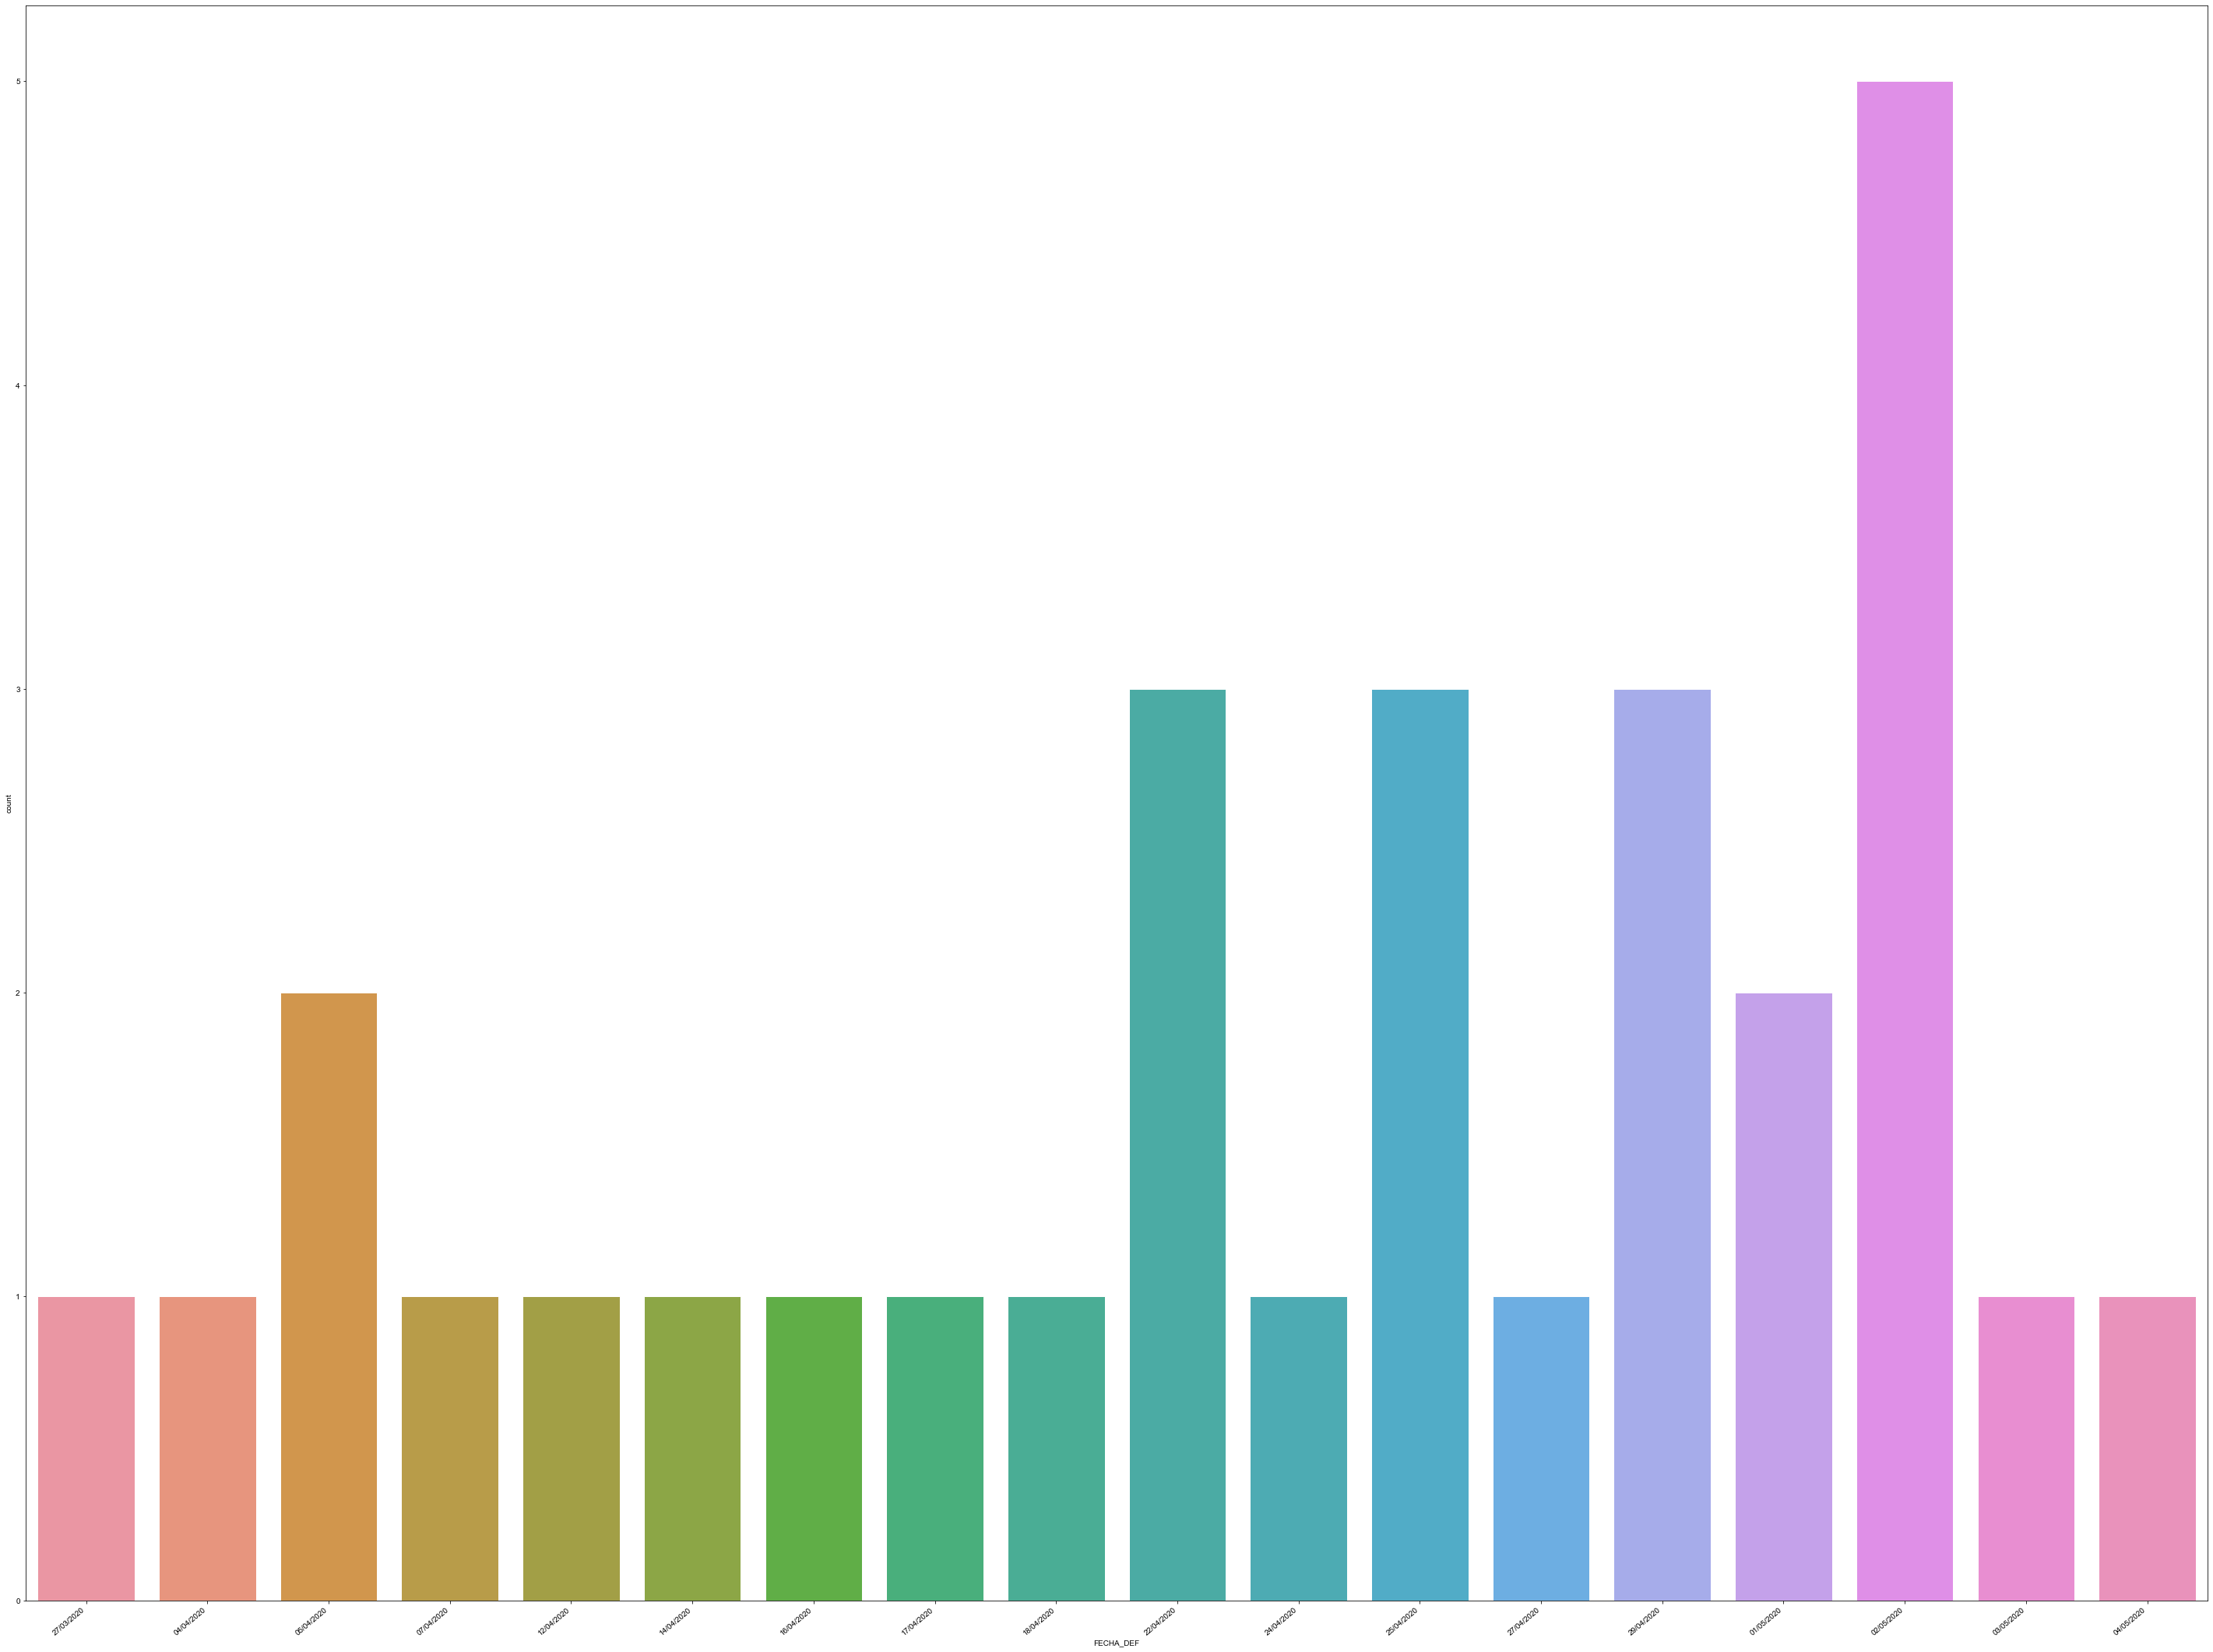

In [10]:
fig, ax = plt.subplots(figsize=(40,30))

df_ultimo_mes = df_pos_fallecidos.tail(30)
df_ultimo_mes["FECHA_DEF_DT"] = pd.to_datetime( df_ultimo_mes["FECHA_DEF"], format="%d/%m/%Y")

df_ultimo_mes=df_ultimo_mes.sort_values(by=["FECHA_DEF_DT"])
sns.countplot(df_ultimo_mes['FECHA_DEF'], sns.set(font_scale=2))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", )
plt.tight_layout()


#### En la gráfica se muestra  la cantidad de fallecidos en los 30 últimos días del mes de abril del 2020

### 2. Distribución geográfica de pacientes positivos(municipio).

In [11]:
df_positivos=df_PACIENTES[(df_PACIENTES["RESULTADO"]==1)]

In [12]:
df_valid_municipios = dfm[~(dfm["Clave Municipio"].isnull())]
PF_POSI=df_PACIENTES[df_PACIENTES["RESULTADO"]==1]
df_PACI_ESTADO=PF_POSI.merge(df_valid_municipios, left_on = "MUNICIPIO_RESIDENCIA", right_on = "Clave Municipio")

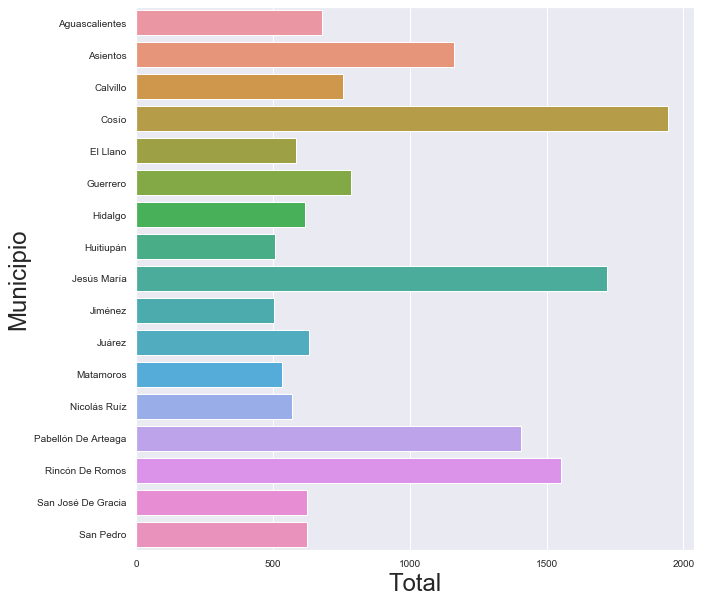

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
df_agrupado = df_PACI_ESTADO.groupby('Municipio').size().reset_index(name='Total')
df_miles_fallecidos  = df_agrupado[df_agrupado["Total"] >= 500]
sns.barplot(x="Total", y="Municipio", data=df_miles_fallecidos)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    
plt.show()
#df_miles_fallecidos

### 3. Cantidad de fallecidos con factores de riesgo.

In [14]:
total_tabaquismo=len(df_pos_fallecidos[df_pos_fallecidos["TABAQUISMO"]==1])
total_obesidad=len(df_pos_fallecidos[df_pos_fallecidos["OBESIDAD"]==1])
total_CARDIOVASCULAR=len(df_pos_fallecidos[df_pos_fallecidos["CARDIOVASCULAR"]==1])
total_HIPERTENSION=len(df_pos_fallecidos[df_pos_fallecidos["HIPERTENSION"]==1])
total_ASMA=len(df_pos_fallecidos[df_pos_fallecidos["ASMA"]==1])
total_INMUSUPR=len(df_pos_fallecidos[df_pos_fallecidos["INMUSUPR"]==1])

total = total_tabaquismo + total_obesidad + total_CARDIOVASCULAR+total_HIPERTENSION+total_ASMA+total_INMUSUPR
print(total)
df_total_factores= pd.DataFrame({"TABAQUISMO":[total_tabaquismo],"OBESIDAD":[total_obesidad],"CARDIOVASCULAR":[total_CARDIOVASCULAR],"HIPERTENSION":[total_HIPERTENSION],"ASMA":[total_ASMA],"INMUSUPR":[total_INMUSUPR]})

2177


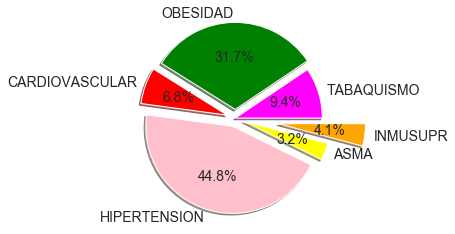

In [15]:
etiqueta = "TABAQUISMO", "OBESIDAD", "CARDIOVASCULAR","HIPERTENSION","ASMA","INMUSUPR"
total = [total_tabaquismo,total_obesidad,total_CARDIOVASCULAR,total_HIPERTENSION,total_ASMA,total_INMUSUPR]  
colores = ['magenta','green','red','pink','yellow',"orange"]
plt.pie(total, labels = etiqueta, colors=colores ,shadow = True, explode = (0.0, 0.1, 0.1, 0.1, 0.1, 0.5), autopct = '%1.1f%%',textprops={'fontsize':14})  
plt.show()  

#### En la siguiente grafica de pie muestra la información de los fallecidos con factores de riesgos. El mayor porcentaje con 44.8% corresponde a Hipertensión y en segundo escalón con 31.7% Obesidad para ambos casos con las de mayor riesgo, siendo la de menor riesgo con 3.2% Asma.

### 4. Distribución por rango de edades de los pacientes positivos.

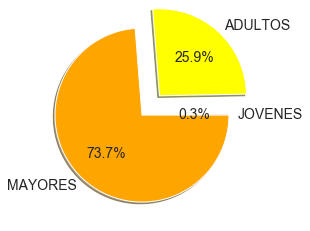

In [16]:
edad_JOVENES=len(df_pos_fallecidos[(df_pos_fallecidos["RESULTADO"]==1)& (df_pos_fallecidos["EDAD"]<21)])
edad_ADULTOS=len(df_pos_fallecidos[(df_pos_fallecidos["RESULTADO"]==1)& (df_pos_fallecidos["EDAD"]>=21)& (df_pos_fallecidos["EDAD"]<50)])
edad_MAYORES=len(df_pos_fallecidos[(df_pos_fallecidos["RESULTADO"]==1)& (df_pos_fallecidos["EDAD"]>=50)])

etiqueta =  ['JOVENES', 'ADULTOS','MAYORES']
total = [edad_JOVENES,edad_ADULTOS,edad_MAYORES]
colores = ['pink','yellow',"orange"]
plt.pie(total, labels = etiqueta, colors=colores ,shadow = True, explode = (0.0, 0.3, 0.0), autopct = '%1.1f%%',textprops={'fontsize':14})  
plt.show() 

#### En la siguiente gráfica se puede observar que el mayor porcentaje de positivos corresponde a personas mayores con un  73% de los casos. 

### 5. Distribución por rango de edades del  tipo de pacientes en el hospital.

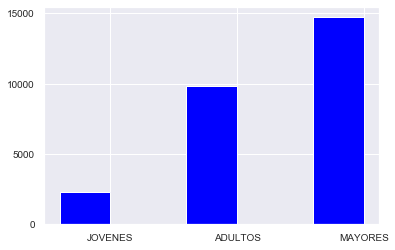

In [17]:
edad_JOVENES=len(df_PACIENTES[(df_PACIENTES["TIPO_PACIENTE"]==2)& (df_PACIENTES["EDAD"]<21)])
edad_ADULTOS=len(df_PACIENTES[(df_PACIENTES["TIPO_PACIENTE"]==2)& (df_PACIENTES["EDAD"]>=21)& (df_PACIENTES["EDAD"]<50)])
edad_MAYORES=len(df_PACIENTES[(df_PACIENTES["TIPO_PACIENTE"]==2)& (df_PACIENTES["EDAD"]>=50)])

fig, ax = plt.subplots()
etiquetas=["JOVENES","ADULTOS","MAYORES"]

valores=[edad_JOVENES,edad_ADULTOS,edad_MAYORES]
x = np.arange(len(etiquetas))  
ancho=0.4
plt.bar(x - ancho/2, valores, ancho, color="blue")

ax.set_xticks(x)
ax.set_xticklabels(etiquetas)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

plt.show()

#### En la  gráfica se puede observar que el mayor número  de pacientes hospitalizados corresponde a personas mayores, alcanzando un valor cercano a los 15000 pacientes. 

### El principal objetivo que se persigue con este trabajo es lograr mediante gráficas poner en contexto la situación del Covid-19 en México, utilizando las variables principales escogidas en le data frame df_PACIENTES.Se ha logrado mostrar la cantidad de pacientes positivos que han fallecido, la distribución geográfica de pacientes positivos por municipios y estados, la cantidad de fallecidos con factores de riesgo. El porcentaje de infección por rango de edades, así como aquellos que han sido hospitalizados por rango de edades. Según los datos procesados se observa que el virus tiene más mortalidad en personas mayores de 50 años, así como en personas que padezcan de hipertensión y obesidad.


### Segunda parte 

### 1.	Número de personas que han dado positivo

In [18]:
len(df_PACIENTES[df_PACIENTES["RESULTADO"]==1])

24905

### 2.	Número de personas que han dado negativo

In [19]:
len(df_PACIENTES[df_PACIENTES["RESULTADO"]==2])

61993

### 3.	Número de personas en UCI

In [20]:
len(df_PACIENTES[df_PACIENTES["UCI"]==1])

2250

### 4.	Número de personas que han fallecido 

In [21]:
len(df_PACIENTES[df_PACIENTES["FECHA_DEF"]!="9999-99-99"])

3580

### 5.	Número de personas que han dado positivo y sin enfermedades 

In [22]:
len(df_PACIENTES[(df_PACIENTES["RESULTADO"]==1)&(df_PACIENTES["CARDIOVASCULAR"]==2)&(df_PACIENTES["OBESIDAD"]==2)&(df_PACIENTES["TABAQUISMO"]==2)&(df_PACIENTES["HIPERTENSION"]==2)])

14292

### 6.	Número de personas que han fallecido (que han dado positivo) y sin enfermedades.

In [23]:
len(df_PACIENTES[(df_PACIENTES["RESULTADO"]==1)&(df_PACIENTES["CARDIOVASCULAR"]==2)&(df_PACIENTES["OBESIDAD"]==2)&(df_PACIENTES["TABAQUISMO"]==2)&(df_PACIENTES["HIPERTENSION"]==2)&(df_PACIENTES["FECHA_DEF"]!="9999-99-99")])

815

### 7.Tiempo promedio entre la fecha de síntomas y la fecha de defunción de los que han dado positivo

In [24]:
df_falle_posi = df_PACIENTES[(df_PACIENTES["FECHA_DEF"]!="9999-99-99")& (df_PACIENTES["RESULTADO"]==1)].copy()
df_falle_posi["DIAS"] = df_falle_posi.apply(lambda x: (datetime.strptime(x["FECHA_DEF"], "%d/%m/%Y") - dt.datetime.strptime(x["FECHA_SINTOMAS"], "%d/%m/%Y")).days, axis=1)
df_falle_posi["DIAS"].mean()

10.15330396475771

### 8.	¿Cuál es la enfermedad con mas prevalencia en los pacientes que dan positivo?

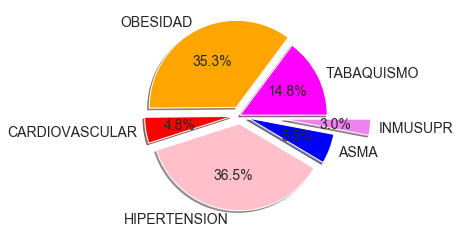

In [25]:
total_tabaquismo=len(df_PACIENTES[(df_PACIENTES["TABAQUISMO"]==1) & (df_PACIENTES["RESULTADO"]==1)])

total_obesidad=len(df_PACIENTES[(df_PACIENTES["OBESIDAD"]==1) & (df_PACIENTES["RESULTADO"]==1)])

total_CARDIOVASCULAR=len(df_PACIENTES[(df_PACIENTES["CARDIOVASCULAR"]==1) & (df_PACIENTES["RESULTADO"]==1)])

total_HIPERTENSION=len(df_PACIENTES[(df_PACIENTES["HIPERTENSION"]==1) & (df_PACIENTES["RESULTADO"]==1)])

total_ASMA=len(df_PACIENTES[(df_PACIENTES["ASMA"]==1) & (df_PACIENTES["RESULTADO"]==1)])

total_INMUSUPR=len(df_PACIENTES[(df_PACIENTES["INMUSUPR"]==1) & (df_PACIENTES["RESULTADO"]==1)])

etiqueta =  ["TABAQUISMO", "OBESIDAD","CARDIOVASCULAR","HIPERTENSION","ASMA","INMUSUPR"]
total = [total_tabaquismo,total_obesidad,total_CARDIOVASCULAR,total_HIPERTENSION,total_ASMA,total_INMUSUPR]
colores = ['magenta','orange','red','pink','blue',"Violet"]
plt.pie(total, labels = etiqueta, colors=colores ,shadow = True, explode = (0.0, 0.1, 0.1, 0.1, 0.1, 0.5), autopct = '%1.1f%%',textprops={'fontsize':14})  
plt.show()  

### 9.	¿Cuál es la enfermedad con menor prevalencia en los pacientes que dan positivo? 

#### La enfermedad con menos prevalencia en los pacientes que dan positivo es la Inmunodeficiencia con  un 3%

### 10.¿Es la misma cantidad de pacientes entubados que los que se encuentran en UCI?

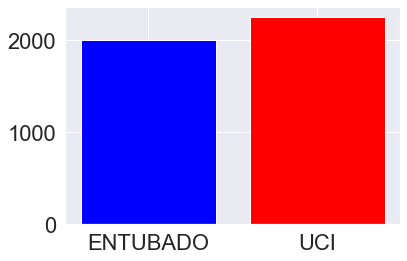

In [26]:
ENTUBADO=len(df_PACIENTES[(df_PACIENTES["INTUBADO"]==1)])
UCI= len(df_PACIENTES[(df_PACIENTES["UCI"]==1)])

etiquetas=["ENTUBADO","UCI"]

valor=[ENTUBADO,UCI]
plt.bar(etiquetas,valor, color=["blue","red"])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

plt.show()

## Gráfica la siguiente información:

### 1.	Número de personas que dan positivo por estado

In [27]:
df= df.rename(columns={"ENTIDAD_RES":"Clave Estado", "MUNICIPIO_RES":"Clave Municipio"})
df_names=pd.merge(df, dfm , on=["Clave Estado", "Clave Municipio"])

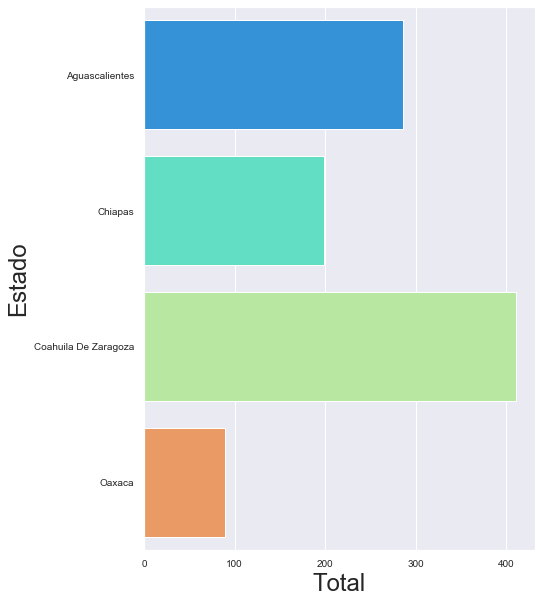

In [28]:
RESULTADO=list(df_names["RESULTADO"].replace({1:"POSITIVO",2:"NEGATIVO",3:"PENDIENTE"}))
ESTADO=list(df_names["Estado"])
df_NEW = pd.DataFrame({"Estado":ESTADO, "RESULTADO":RESULTADO})
personas_resultado_pos=df_NEW[df_NEW["RESULTADO"]=="POSITIVO"]
dfg1 = personas_resultado_pos.groupby(["Estado"]).size().reset_index(name='Total')

fig, ax = plt.subplots(figsize=(7,10))
sns.barplot(x="Total", y="Estado",  data=dfg1, palette="rainbow")

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

plt.show()

### 2.	Número de personas que dan negativo por estado

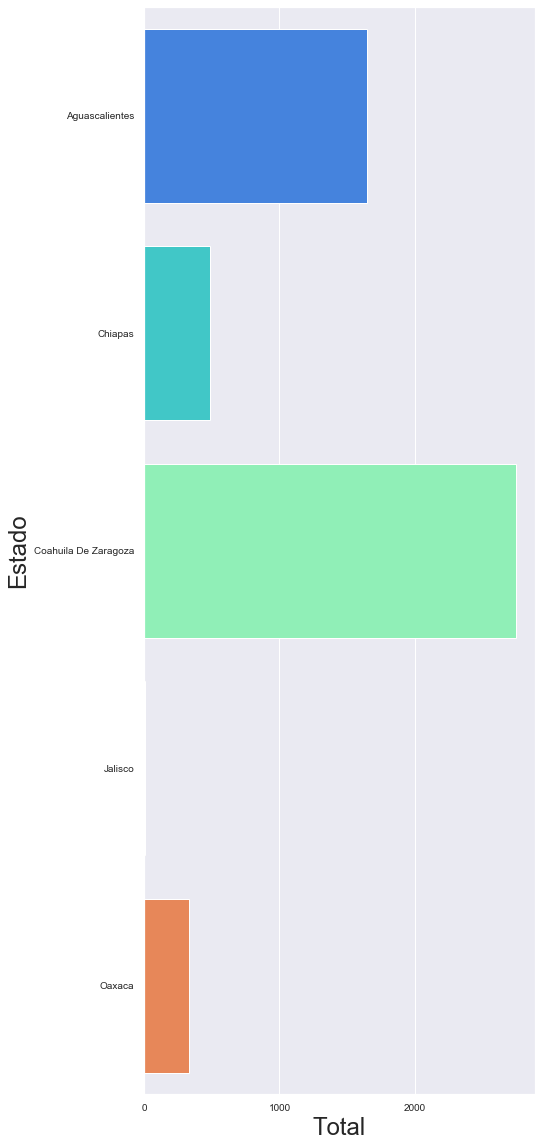

In [29]:
RESULTADO=list(df_names["RESULTADO"].replace({1:"POSITIVO",2:"NEGATIVO",3:"PENDIENTE"}))
ESTADO=list(df_names["Estado"])
df_NEW = pd.DataFrame({"Estado":ESTADO, "RESULTADO":RESULTADO})
personas_resultado_pos=df_NEW[df_NEW["RESULTADO"]=="NEGATIVO"]
dfg1 = personas_resultado_pos.groupby(["Estado"]).size().reset_index(name='Total')

fig, ax = plt.subplots(figsize=(7,20))
sns.barplot(x="Total", y="Estado",  data=dfg1, palette="rainbow")

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

plt.show()

### 3.	El municipio de cada estado con más positivos

In [30]:
PF_POSI=df_PACIENTES[df_PACIENTES["RESULTADO"]==1]

df_PACI_MUNI=pd.merge(left=PF_POSI, right=dfm, left_on = "MUNICIPIO_RESIDENCIA", right_on="Clave Municipio")

df_Total_x_Estado_Municipios = df_PACI_MUNI.groupby(["Estado","Municipio"]).size().reset_index(name='Total')
df_Total_x_Estado_Municipios = df_Total_x_Estado_Municipios.set_index(["Estado","Municipio"])

df_Total_x_Estado_Municipios.loc[df_Total_x_Estado_Municipios["Total"].groupby(level=0).idxmax()]

,,Total
Estado,Municipio,
Aguascalientes,Cosío,1942
Chiapas,Nicolás Ruíz,568
Coahuila De Zaragoza,Guerrero,787
Jalisco,Teuchitlán,14
Oaxaca,San Juan Del Estado,320


### 4.	Distribución de las edades que han dado positivo entre hombres y mujeres

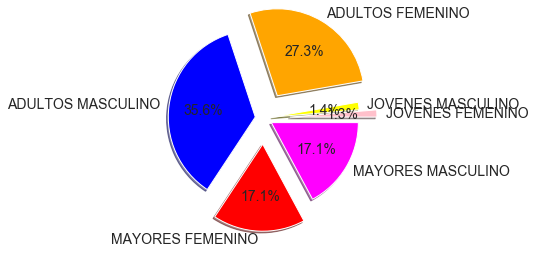

In [31]:
edad_JOVENES1=len(PF_POSI[(PF_POSI["SEXO"]==1)&(PF_POSI["RESULTADO"]==1)& (PF_POSI["EDAD"]<21)])
edad_JOVENES2=len(PF_POSI[(PF_POSI["SEXO"]==2)&(PF_POSI["RESULTADO"]==1)& (PF_POSI["EDAD"]<21)])

edad_ADULTOS1=len(PF_POSI[(PF_POSI["SEXO"]==1)&(PF_POSI["RESULTADO"]==1)& (PF_POSI["EDAD"]<50)])
edad_ADULTOS2=len(PF_POSI[(PF_POSI["SEXO"]==2)&(PF_POSI["RESULTADO"]==1)& (PF_POSI["EDAD"]<50)])


edad_MAYORES1=len(PF_POSI[(PF_POSI["SEXO"]==1)&(PF_POSI["RESULTADO"]==1)& (PF_POSI["EDAD"]>=50)])
edad_MAYORES2=len(PF_POSI[(PF_POSI["SEXO"]==1)&(PF_POSI["RESULTADO"]==1)& (PF_POSI["EDAD"]>=50)])


etiqueta =  ['JOVENES FEMENINO','JOVENES MASCULINO','ADULTOS FEMENINO','ADULTOS MASCULINO','MAYORES FEMENINO','MAYORES MASCULINO']
total = [edad_JOVENES1,edad_JOVENES2,edad_ADULTOS1,edad_ADULTOS2,edad_MAYORES1,edad_MAYORES2]
colores = ['pink','yellow',"orange",'blue',"red","magenta"]
plt.pie(total, labels = etiqueta, colors=colores ,shadow = True, explode = (0.3, 0.1, 0.3, 0.1, 0.3, 0.1), autopct = '%1.1f%%',textprops={'fontsize':14})  

plt.show() 

### 5.	Distribución de las edades que han dado negativo entre hombres y mujeres

In [32]:
PF_NEGA=df_PACIENTES[df_PACIENTES["RESULTADO"]==2]

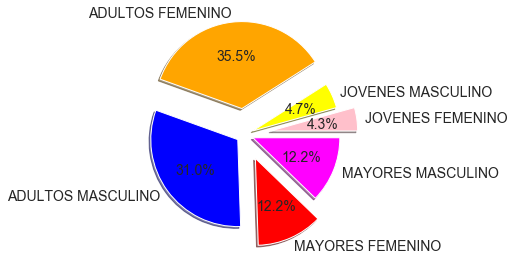

In [33]:
edad_JOVENES1=len(PF_NEGA[(PF_NEGA["SEXO"]==1)&(PF_NEGA["RESULTADO"]==2)& (PF_NEGA["EDAD"]<21)])
edad_JOVENES2=len(PF_NEGA[(PF_NEGA["SEXO"]==2)&(PF_NEGA["RESULTADO"]==2)& (PF_NEGA["EDAD"]<21)])
edad_ADULTOS1=len(PF_NEGA[(PF_NEGA["SEXO"]==1)&(PF_NEGA["RESULTADO"]==2)& (PF_NEGA["EDAD"]<50)])
edad_ADULTOS2=len(PF_NEGA[(PF_NEGA["SEXO"]==2)&(PF_NEGA["RESULTADO"]==2)& (PF_NEGA["EDAD"]<50)])
edad_MAYORES1=len(PF_NEGA[(PF_NEGA["SEXO"]==1)&(PF_NEGA["RESULTADO"]==2)& (PF_NEGA["EDAD"]>=50)])
edad_MAYORES2=len(PF_NEGA[(PF_NEGA["SEXO"]==1)&(PF_NEGA["RESULTADO"]==2)& (PF_NEGA["EDAD"]>=50)])

etiqueta =  ['JOVENES FEMENINO','JOVENES MASCULINO','ADULTOS FEMENINO','ADULTOS MASCULINO','MAYORES FEMENINO','MAYORES MASCULINO']
total = [edad_JOVENES1,edad_JOVENES2,edad_ADULTOS1,edad_ADULTOS2,edad_MAYORES1,edad_MAYORES2]
colores = ['pink','yellow',"orange",'blue',"red","magenta"]
plt.pie(total, labels = etiqueta, colors=colores ,shadow = True, explode = (0.3, 0.1, 0.3, 0.1, 0.3, 0.1), autopct = '%1.1f%%',textprops={'fontsize':14})  
plt.show() 

###	6.	Distribución de las personas que han fallecido entre hombres y mujeres

In [34]:
df_falle=df_PACIENTES[df_PACIENTES["FECHA_DEF"]!="9999-99-99"]

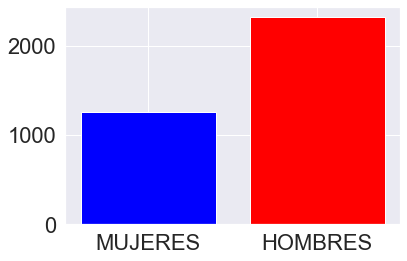

In [35]:
MUJERES_FALLECIDAS=len(df_falle[(df_falle["SEXO"]==1)&(df_falle["FECHA_DEF"]!="9999-99-99")])
HOMBRES_FALLECIDOS=len(df_falle[(df_falle["SEXO"]==2)&(df_falle["FECHA_DEF"]!="9999-99-99")])

fig, ax = plt.subplots()
etiquetas=["MUJERES","HOMBRES"]
valores=[MUJERES_FALLECIDAS,HOMBRES_FALLECIDOS]
plt.bar(etiquetas,valores, color=["blue","red"])
plt.show()

### 7.	En un mapa agrega un pop-up text con el número de positivos para cada estado

In [36]:
df_NEW1 = pd.DataFrame({"Estado":ESTADO, "RESULTADO":RESULTADO})
person_resul_pos=df_NEW1[df_NEW1["RESULTADO"]=="NEGATIVO"]
dfg3 = person_resul_pos.groupby(["Estado"]).size().reset_index(name='Total')

In [37]:
COORDENADAS= df_names[["Estado","Municipio","Latitud", "Longitud", "RESULTADO"]]
COORDENADAS1=COORDENADAS[COORDENADAS["RESULTADO"]==1]
COORDENADAS2=COORDENADAS1.groupby(["Estado"], as_index=False)["RESULTADO"].count()
COORDENADAS3=COORDENADAS2.merge(dfe, left_on='Estado', right_on='Estado')

In [38]:
MEX_map = fol.Map(location=[21.8818, -102.291], zoom_start=5)
# Inicializamos un feature group para los incidentes en el dataframe

COVID= fol.map.FeatureGroup()
for index, row in COORDENADAS3.iterrows(): 
    COVID.add_child(
            fol.CircleMarker(location=[float(row["Latitud"]),float(row["Longitud"])],
            radius=4, # difine el tamaño de los circulos
            fill=True,
            popup= "Positivos: " + str(row["RESULTADO"]),                 
            fill_opacity=0.4))
        
    
    MEX_map.add_child(COVID)

MEX_map

### 8.	Crea un choromap para ver por colores el número de positivos para cada estado.

In [39]:
geo_mexico = "mexico.json"
latitud = dfe["Latitud"][0]
longitud = dfe["Longitud"][0]

mapa = fol.Map(location=[latitud, longitud], zoom_start=5)

#df_municipios_validos = dfm[~(dfm["Municipio"].isnull())]
#df_municipios_validos.drop_duplicates(subset='Municipio', keep="first")
df_municipios_total_info = pd.merge(df_agrupado,dfm[["Municipio","Estado"]], how='inner', left_on="Municipio", right_on="Municipio")


fol.Choropleth(
    geo_data=geo_mexico,
    name='Positivos por estado',
    data=df_municipios_total_info,
    columns=['Estado', 'Total'],
    key_on='properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Positivos'
).add_to(mapa)

fol.LayerControl().add_to(mapa)

mapa
